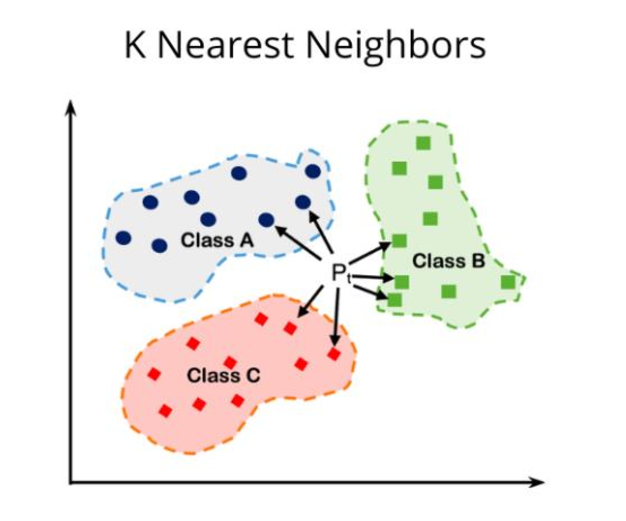


## 🔍 Understanding K-Nearest Neighbors (KNN) and Our Implementation  



  

The **K-nearest neighbor** is the algorithm that forms the basis of nearest-neighbor associated supervised learning in the classification and regression context. It takes the value of K and finds the 'K' closest neighbor data to the new input and assigns it to the most common class among those nearest points. It is non-parametric because it makes no assumption about the data distribution. Thus, it can be applied to any dataset such as the one we implemented, the Iris dataset .

Then, we divided the data set into training (80%) and test (20%) sets** in order to test our model on data not previously seen. We now move on to using the `KNeighborsClassifier(n_neighbors=5)` function to train a KNN classifier that classifies an input based on the closest five points. **.score() was implemented to test the accuracy of the model on test data, which turned out pretty high, about ~96%.


---

In this code, I first **loaded the Iris dataset** from `sklearn.datasets.load_iris()`, which contains **150 samples of three Iris flower species** (`setosa`, `versicolor`, and `virginica`). The dataset consists of **four features**:  
- **Sepal length**  
- **Sepal width**  
- **Petal length**  
- **Petal width**  

---


Eventually, we **predicted the class of a new flower sample by making use of its feature values, and then produced a classification report** outlining precision, recall, and F1-score for each class.

Overall, this is a way of demonstrating KNN used effectively for flowers classified by physical measurement, which is a very simple yet powerful algorithm in the machine learning domain for pattern recognition.

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
# Set Seaborn style for better visualization
sns.set()

I use Iris Dataset for training and testing

In [12]:
# Load the Iris dataset
iris = load_iris()

Convert dataset into a DataFrame

---

In [13]:

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df['class_name'] = df['class'].map(lambda x: iris.target_names[x])  # Map class index to class name


 Display first few rows

 ---

In [14]:

print("🔹 First 5 samples from the dataset:")
print(df.head())

🔹 First 5 samples from the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class class_name  
0      0     setosa  
1      0     setosa  
2      0     setosa  
3      0     setosa  
4      0     setosa  


 Pairplot visualization of feature relationships


 ---

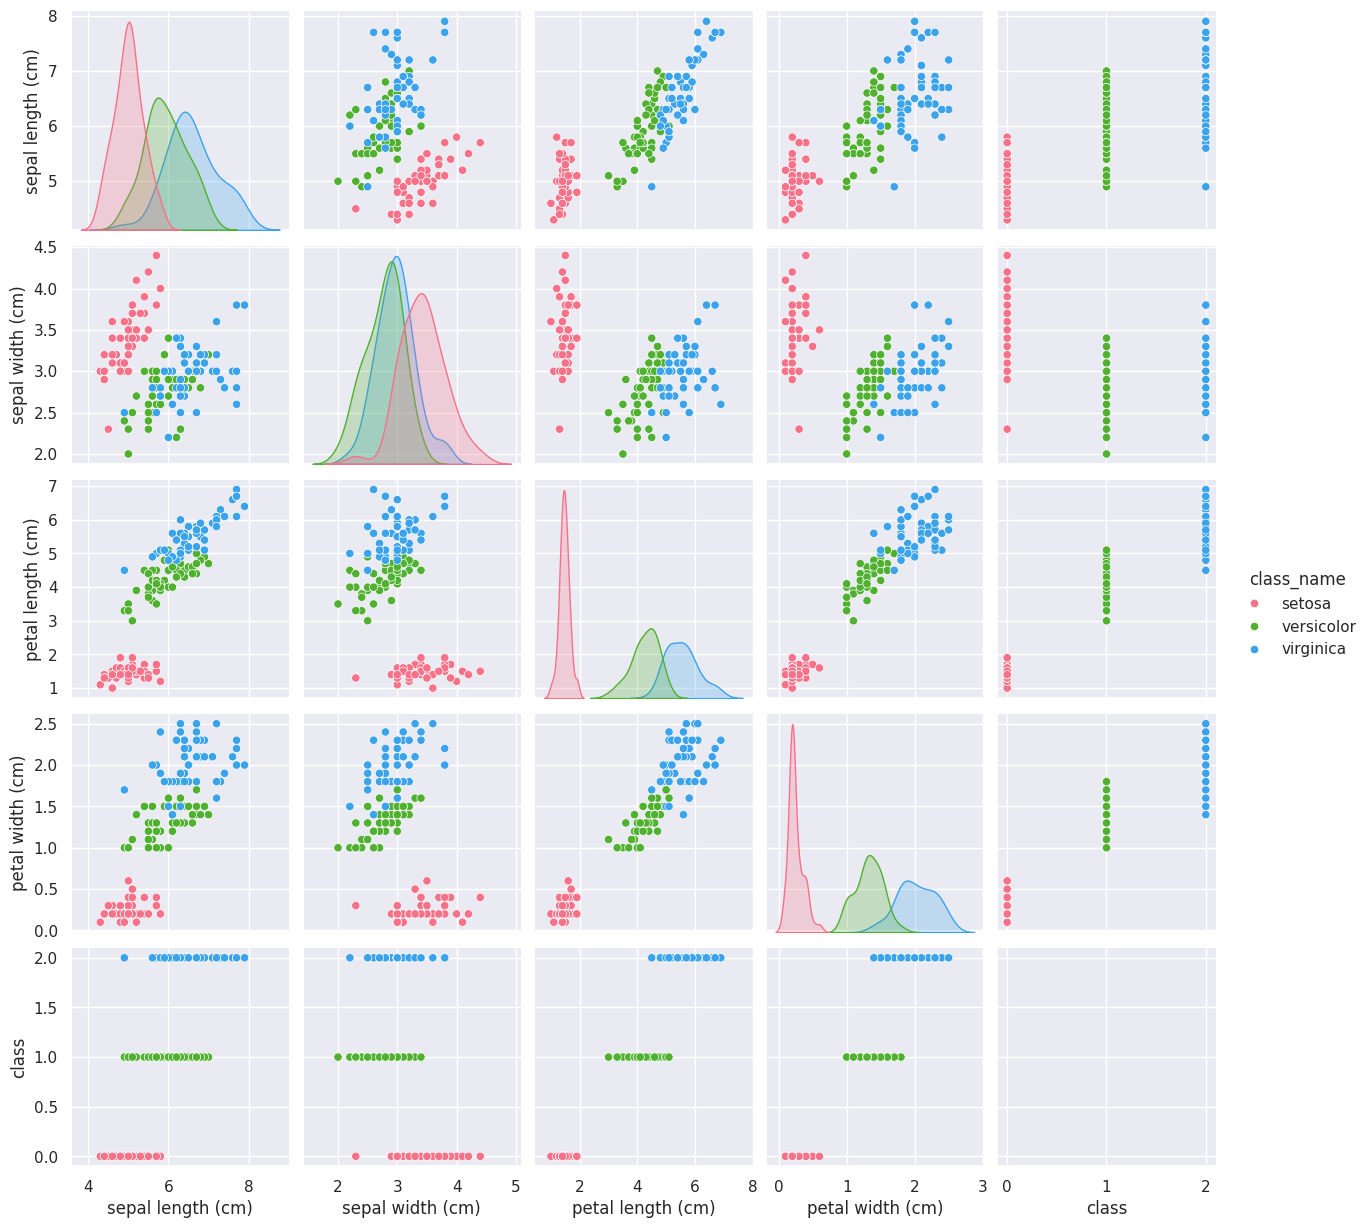

In [15]:

sns.pairplot(df, hue='class_name', palette="husl")
plt.show()


 Split dataset into training (80%) and testing (20%) and # Function to create and train the KNN model

 ----

In [24]:

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)


def train_knn(X_train, y_train, neighbors=5):

    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    return model


 Hyperparameter tuning using GridSearchCV


 ----

In [17]:
def optimize_knn(X_train, y_train):

    param_grid = {'n_neighbors': np.arange(1, 20)}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    print(f"✅ Best K found: {grid.best_params_['n_neighbors']}")
    return grid.best_estimator_


 Train the optimized KNN model


 ----

In [34]:
print("\n Optimizing KNN...")
knn_model = optimize_knn(X_train, y_train)



 Optimizing KNN...
✅ Best K found: 12


 Evaluate the model


 ----

In [25]:

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.4f}")



 Model Accuracy: 1.0000


 Display classification report


 ----

In [27]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Plot Confusion Matrix


----

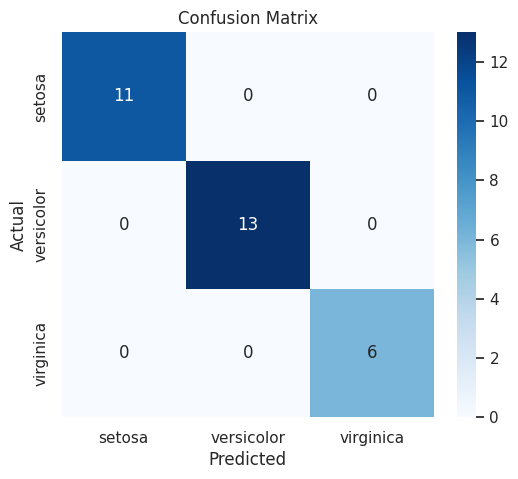

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 Function to make a prediction

In [31]:
def predict_class(model, sample):

    predicted_index = model.predict([sample])[0]
    return iris.target_names[predicted_index]

 Evaluate the model

 ---

In [32]:

accuracy = knn_model.score(X_test, y_test)
print(f" Model Accuracy: {accuracy:.4f}")


 Model Accuracy: 1.0000


In [33]:
sample = [[5.6, 4.4, 1.2, 0.4]]

# Predict class
predicted_class = knn_model.predict(sample)
predicted_class_name = iris.target_names[predicted_class[0]]

print(f" Predicted class for sample {sample}: {predicted_class_name}")


 Predicted class for sample [[5.6, 4.4, 1.2, 0.4]]: setosa
